In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/astana/Astana.png


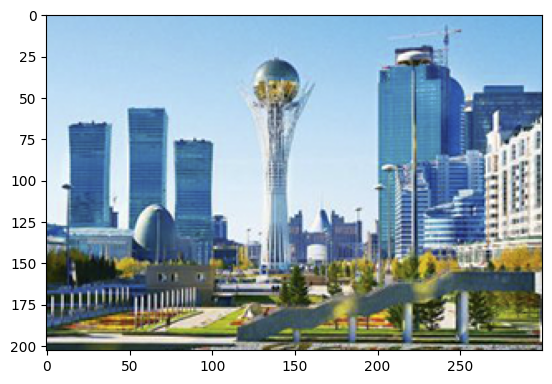

In [32]:
import matplotlib.pyplot as plt
from PIL import Image
astana = Image.open('/kaggle/input/astana/Astana.png')
astana = np.array(astana)
plt.imshow(astana)

5


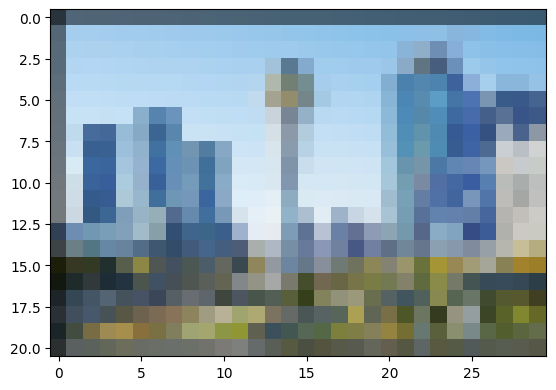

In [51]:
kernel = np.ones((10, 10))
stride = 10
w = max(astana.shape[0], astana.shape[1])
k = max(kernel.shape[0], kernel.shape[1])
padding = 5
# padding = ((k + w * stride - w - stride) // 2)
print(padding)
newastanaR = np.zeros((astana.shape[0] + 2 * padding, astana.shape[1] + 2 * padding))
newastanaG = np.zeros((astana.shape[0] + 2 * padding, astana.shape[1] + 2 * padding))
newastanaB = np.zeros((astana.shape[0] + 2 * padding, astana.shape[1] + 2 * padding))
for i in range(newastanaR.shape[0]):
    for j in range(newastanaR.shape[1]):
        if i >= padding and j >= padding and i < newastanaR.shape[0] - padding and j < newastanaR.shape[1] - padding:
            newastanaR[i][j] = astana[i - padding][j - padding][0]
            newastanaG[i][j] = astana[i - padding][j - padding][1]
            newastanaB[i][j] = astana[i - padding][j - padding][2]
newastanaFR = []
newastanaFG = []
newastanaFB = []
for i in range(0, newastanaR.shape[0] - kernel.shape[0], stride):
    resR = []
    for j in range(0, newastanaR.shape[1] - kernel.shape[1], stride):
        sum = 0
        cnt = 0
        for t1 in range(0, kernel.shape[0]):
            for t2 in range(0, kernel.shape[1]):
                sum += kernel[t1][t2] * newastanaR[i + t1][j + t2]
                cnt += 1
        resR.append(sum / cnt)
    newastanaFR.append(resR)
for i in range(0, newastanaR.shape[0] - kernel.shape[0], stride):
    resG = []
    for j in range(0, newastanaR.shape[1] - kernel.shape[1], stride):
        sum = 0
        cnt = 0
        for t1 in range(0, kernel.shape[0]):
            for t2 in range(0, kernel.shape[1]):
                sum += kernel[t1][t2] * newastanaG[i + t1][j + t2]
                cnt += 1
        resG.append(sum / cnt)
    newastanaFG.append(resG)
for i in range(0, newastanaR.shape[0] - kernel.shape[0], stride):
    resB = []
    for j in range(0, newastanaR.shape[1] - kernel.shape[1], stride):
        sum = 0
        cnt = 0
        for t1 in range(0, kernel.shape[0]):
            for t2 in range(0, kernel.shape[1]):
                sum += kernel[t1][t2] * newastanaB[i + t1][j + t2]
                cnt += 1
        resB.append(sum / cnt)
    newastanaFB.append(resB)
new_astanaF = []
for i in range(len(newastanaFR)):
    x = []
    for j in range(len(newastanaFR[i])):
        x.append([round(newastanaFR[i][j]), round(newastanaFG[i][j]), round(newastanaFB[i][j])])
    new_astanaF.append(x)
plt.imshow(new_astanaF)

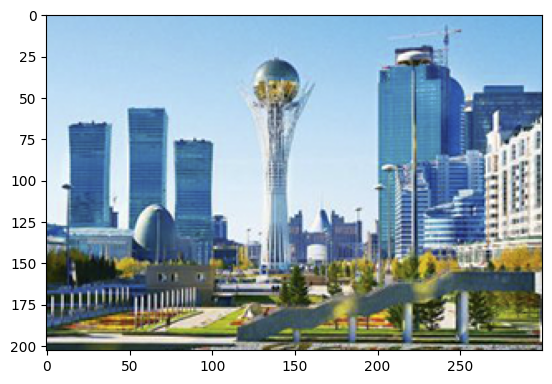

In [34]:

plt.imshow(astana)